In [15]:
from PIL import Image
import pandas as pd
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [31]:
directory = "Data"
csv_file = "index.csv"
csv_path = os.path.join(directory, csv_file)

In [32]:
csv_path

'Data/index.csv'

In [33]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [40]:
image_name = data_name.iloc[1,1]
image_path = os.path.join(directory, image_name)

In [41]:
image_path

'Data/img/fashion1.png'

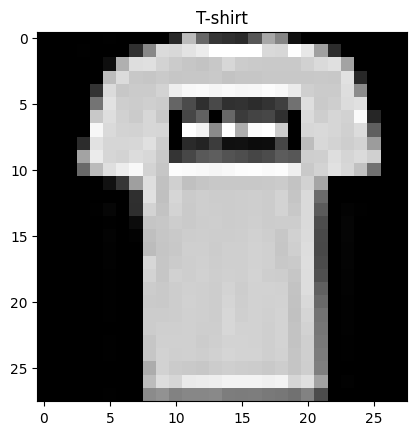

In [42]:
image = Image.open(image_path)
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
plt.title(data_name.iloc[1,0])
plt.show()

## Dataset Class

In [43]:
class Dataset(Dataset):
    
    def __init__(self, csv_file, data_dir, transform = None):
        
        self.transform = transform
        self.data_dir = data_dir
        data_dircsv_file = os.path.join(self.data_dir, csv_file)
        self.data_name = pd.read_csv(data_dircsv_file)
        self.len = self.data_name.shape[0]
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 1])
        image = Image.open(img_name)
        
        y = self.data_name.iloc[idx, 0]
        
        if self.transform:
            image = self.transform(image)
        return image, y
        

In [44]:
dataset = Dataset(csv_file = csv_file, data_dir = directory)

In [51]:
image, y = dataset[0]

In [54]:
image = dataset[0][0]
y = dataset[0][1]

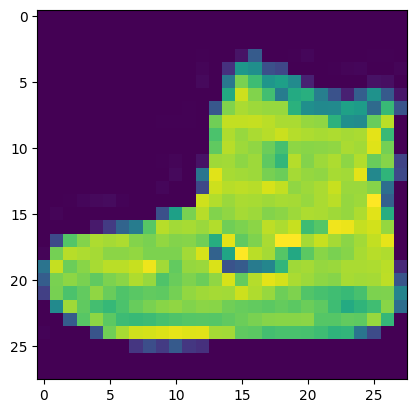

In [56]:
plt.imshow(image)

In [57]:
y

'Ankle boot'

## Transform

In [58]:
import torchvision.transforms as transforms

In [60]:
croptensor_data_transforms = transforms.Compose([transforms.CenterCrop(20),
                                                 transforms.ToTensor()])

In [62]:
dataset = Dataset(csv_file = csv_file, data_dir = directory, transform = croptensor_data_transforms)

In [64]:
dataset[0][0].shape

torch.Size([1, 20, 20])

## Torch Vision Dataset

In [70]:
import torchvision.datasets as dsets

In [72]:
dataset = dsets.MNIST(root = "Data", train = False, download = True, transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/train-images-idx3-ubyte.gz to Data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/train-labels-idx1-ubyte.gz to Data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/t10k-images-idx3-ubyte.gz to Data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to Data/MNIST/raw

